In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk

In [26]:
data = pd.read_csv(r"F:\DSA\Data Sets ICT\diamonds_new.csv")

In [27]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [28]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [30]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [31]:
data.isnull().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

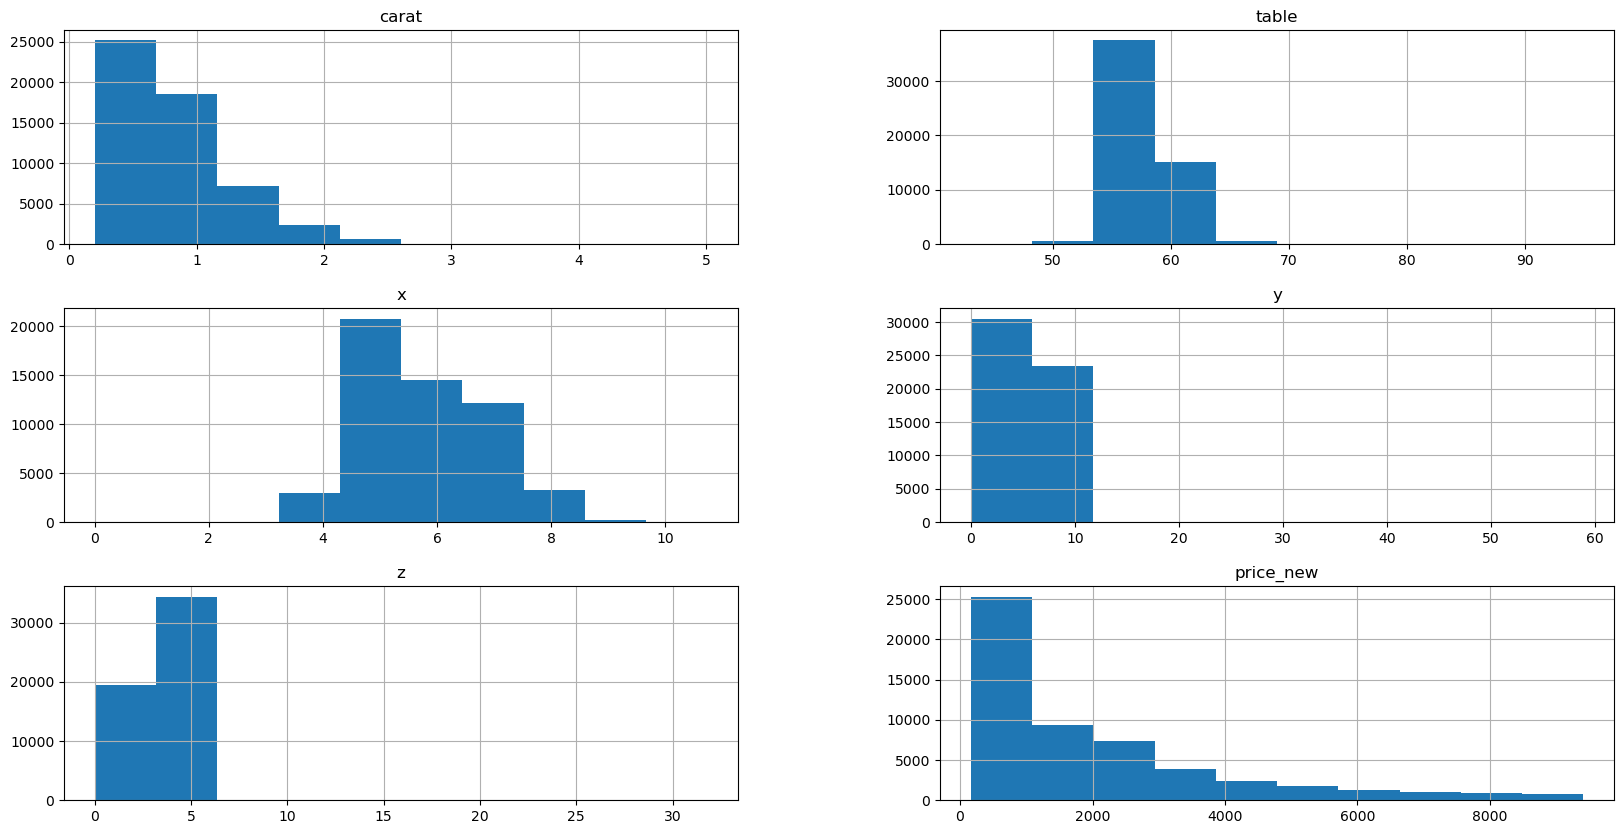

In [32]:
graphs = data.select_dtypes(include = 'float64')
graphs.hist(figsize = (20,10))
plt.show()

In [33]:
##HANDLING MISSING VALUES

#Carat has a histogram skewed towards left which gives us Median.
#Table is centrally concentrated so Mean filling.

data['carat'].fillna(data['carat'].median(), inplace=True)
data['table'].fillna(data['table'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18528\3237885266.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['carat'].fillna(data['carat'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18528\3237885266.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [34]:
#Color data null values are filled with Mode.
data['color'].fillna(data['color'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18528\162754272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['color'].fillna(data['color'].mode()[0], inplace=True)


In [35]:
#Checking the data for null values after filling
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

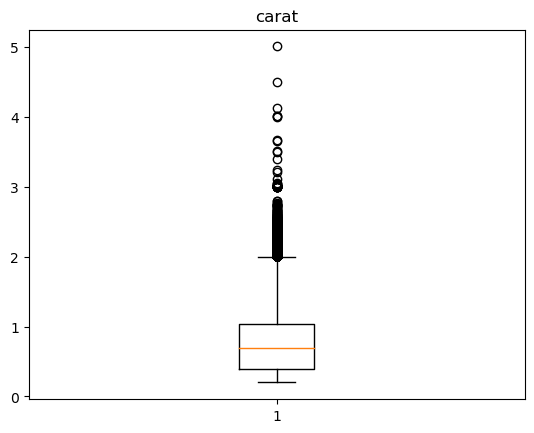

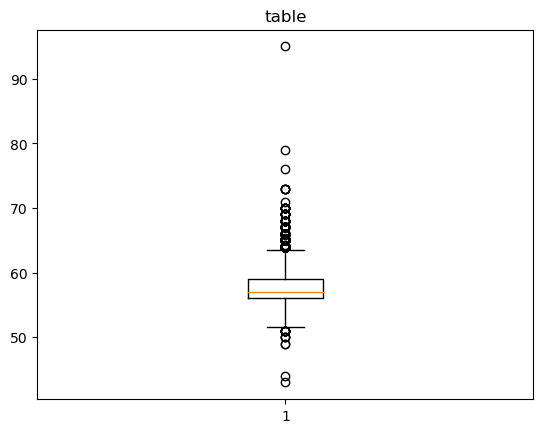

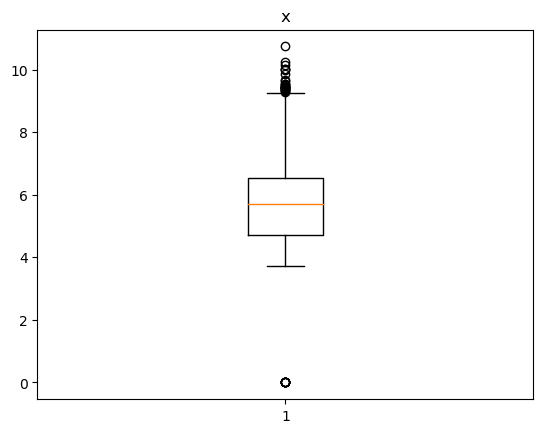

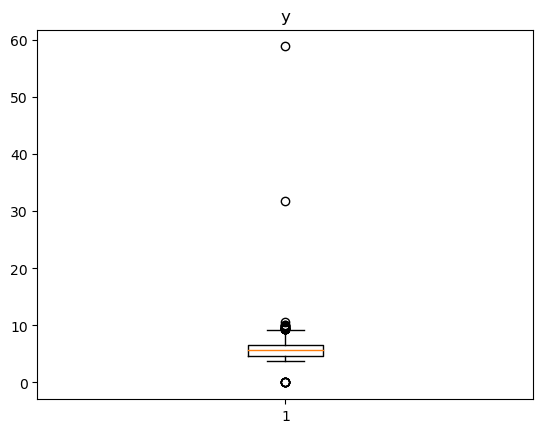

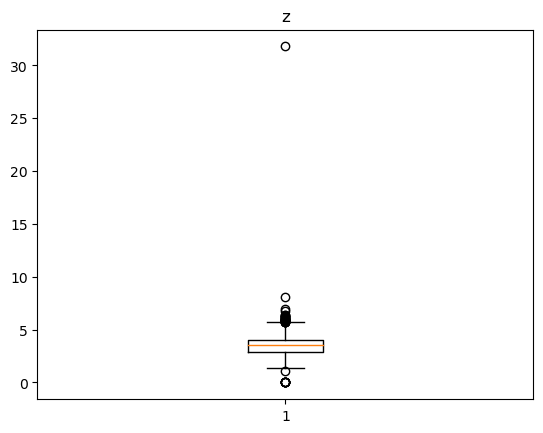

In [39]:
#Handling Outliers

cols = ['carat','table','x', 'y','z']
for values in cols:
    plt.boxplot(data[values])
    plt.title(values)
    plt.show()

In [44]:
#Function to do zscore analysis and outlier detection using zscore

from scipy import stats

def outliers_zscore(data, columns, threshold=3):
    z_scores = np.abs(stats.zscore(data[columns]))

    # Identifying rows with outliers
    outliers = np.where((z_scores > threshold) | (z_scores < -threshold))

    # Creating a new DataFrame without outliers
    data_new = data.drop(outliers[0], axis=0)

    # Printing outliers (optional)
    data_outliers = data.iloc[outliers[0], :] #Only if needed

    return data_new, data_outliers

columns = ['table', 'x', 'z']
data_new, data_outliers = outliers_zscore(data, columns)
data_new

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [59]:
def outliers_iqr(data, columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        
       #Clipping
        data[i] = data[i].clip(lower=low_lim, upper=up_lim)

        # Outliers (optional)
        outliers = data[(data[i] < low_lim) | (data[i] > up_lim)] #Print if needed
    return data

columns = ['carat', 'y']
data_new = outliers_iqr(data_new, columns)
data_new

#Note: The datframes can be merged using merge() if the function variables are returning different tables

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


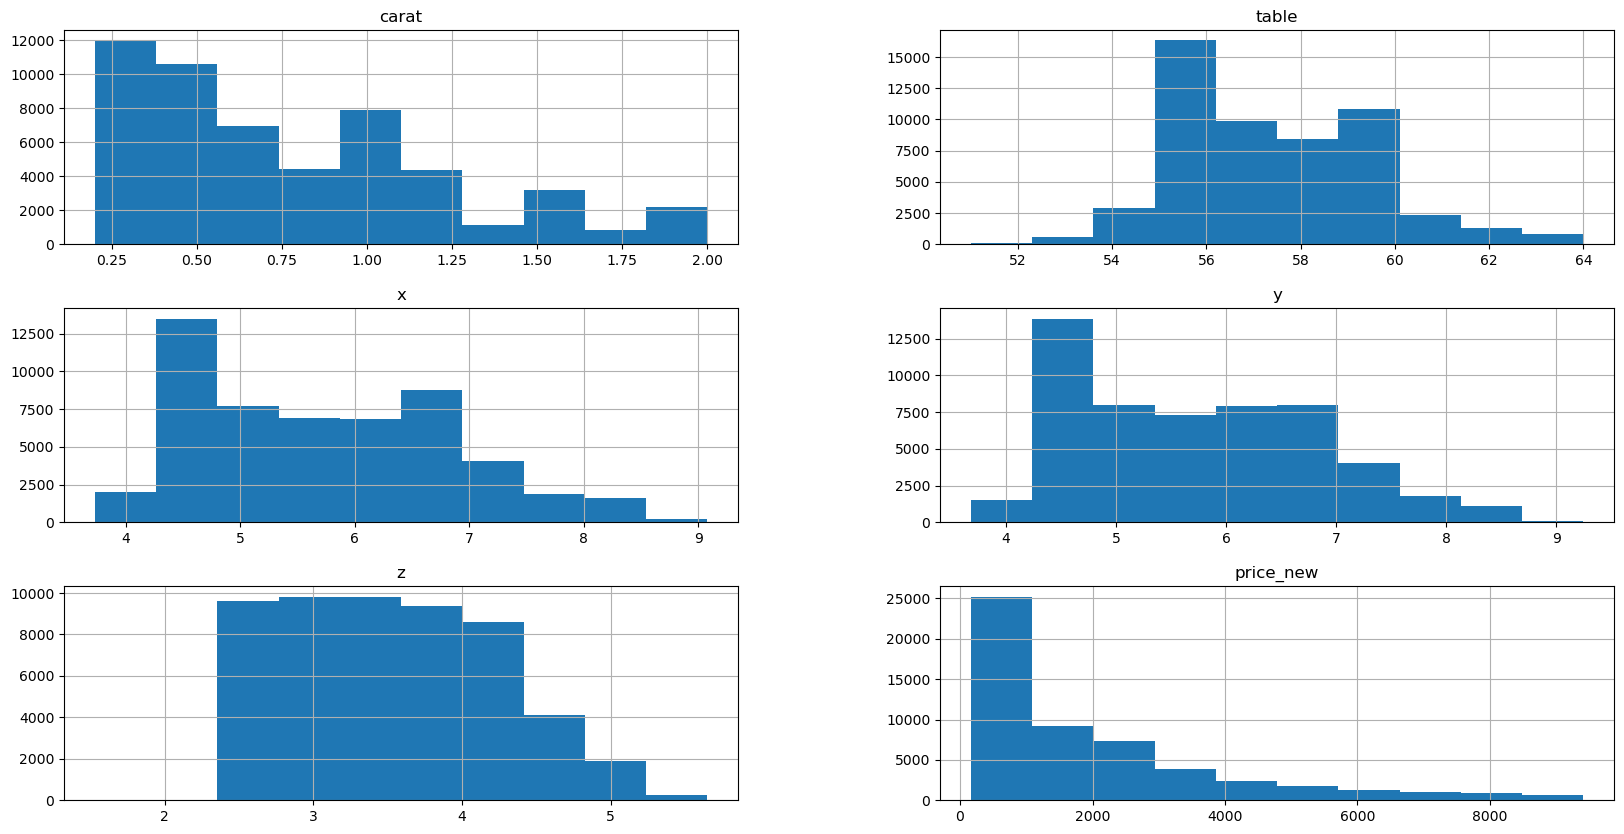

In [60]:
graphs = data_new.select_dtypes(include = 'float64')
graphs.hist(figsize = (20,10))
plt.show()

In [61]:
data_new.shape

(53549, 9)

In [57]:
data_new.isnull().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [62]:
data = data_new

In [63]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [67]:
#Correlation

num_data = data.select_dtypes(include='float64')
corr_matrix = num_data.corr()
corr_matrix

,carat,table,x,y,z,price_new
carat,1.000000,0.187130,0.983292,0.982400,0.981769,0.922503
table,0.187130,1.000000,0.196811,0.191636,0.159574,0.131562
x,0.983292,0.196811,1.000000,0.998566,0.991384,0.887223
y,0.982400,0.191636,0.998566,1.000000,0.991036,0.888599
z,0.981769,0.159574,0.991384,0.991036,1.000000,0.881811
price_new,0.922503,0.131562,0.887223,0.888599,0.881811,1.000000


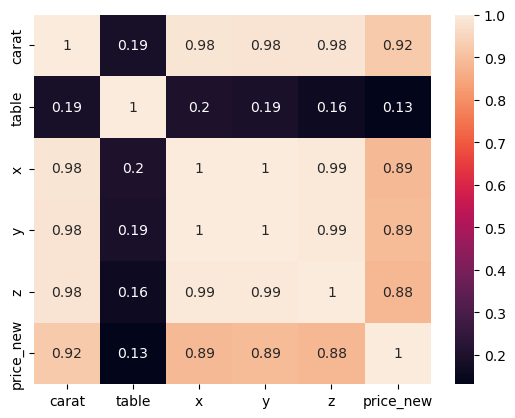

In [100]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [69]:
#Encoding of Object Data

obj_data = data.select_dtypes(include = 'object')
le = sk.LabelEncoder()
for i in obj_data:
    data[i] = le.fit_transform(data[i])

In [71]:
data = pd.get_dummies(data)

In [72]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5
5,0.24,4,6,7,57.0,3.94,3.96,2.48,168.0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53549 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53549 non-null  float64
 1   cut        53549 non-null  int32  
 2   color      53549 non-null  int32  
 3   clarity    53549 non-null  int32  
 4   table      53549 non-null  float64
 5   x          53549 non-null  float64
 6   y          53549 non-null  float64
 7   z          53549 non-null  float64
 8   price_new  53549 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 3.5 MB


In [74]:
data.describe()

,carat,cut,color,clarity,table,x,y,z,price_new
count,53549.000000,53549.000000,53549.000000,53549.000000,53549.000000,53549.000000,53549.000000,53549.000000,53549.000000
mean,0.790606,2.566677,2.592411,3.838877,57.404352,5.726087,5.728449,3.536874,1960.557611
std,0.455840,1.015374,1.700265,1.724009,2.120631,1.115072,1.107461,0.688989,1989.241945
min,0.200000,0.000000,0.000000,0.000000,51.000000,3.730000,3.680000,1.530000,163.000000
25%,0.400000,2.000000,1.000000,2.000000,56.000000,4.710000,4.720000,2.910000,472.500000
50%,0.700000,2.000000,3.000000,4.000000,57.000000,5.690000,5.710000,3.520000,1198.500000
75%,1.040000,3.000000,4.000000,5.000000,59.000000,6.540000,6.530000,4.030000,2658.000000
max,2.000000,4.000000,6.000000,7.000000,64.000000,9.080000,9.245000,5.650000,9411.500000


In [84]:
#Standardized Scaling

x = data.drop(['carat', 'cut', 'color', 'clarity', 'table', 'price_new'], axis = 1)
sc = sk.StandardScaler()
x_sc = sc.fit_transform(x)
x_sc = pd.DataFrame(x_sc)

In [86]:
x

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
5,3.94,3.96,2.48
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


In [85]:
x_sc.describe()

,0,1,2
count,5.354900e+04,5.354900e+04,5.354900e+04
mean,6.496512e-16,-2.250426e-16,6.878660e-16
std,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.790113e+00,-1.849698e+00,-2.912808e+00
25%,-9.112382e-01,-9.106039e-01,-9.098542e-01
50%,-3.236318e-02,-1.665881e-02,-2.449049e-02
75%,7.299264e-01,7.237806e-01,7.157316e-01
max,3.007827e+00,3.175357e+00,3.067025e+00


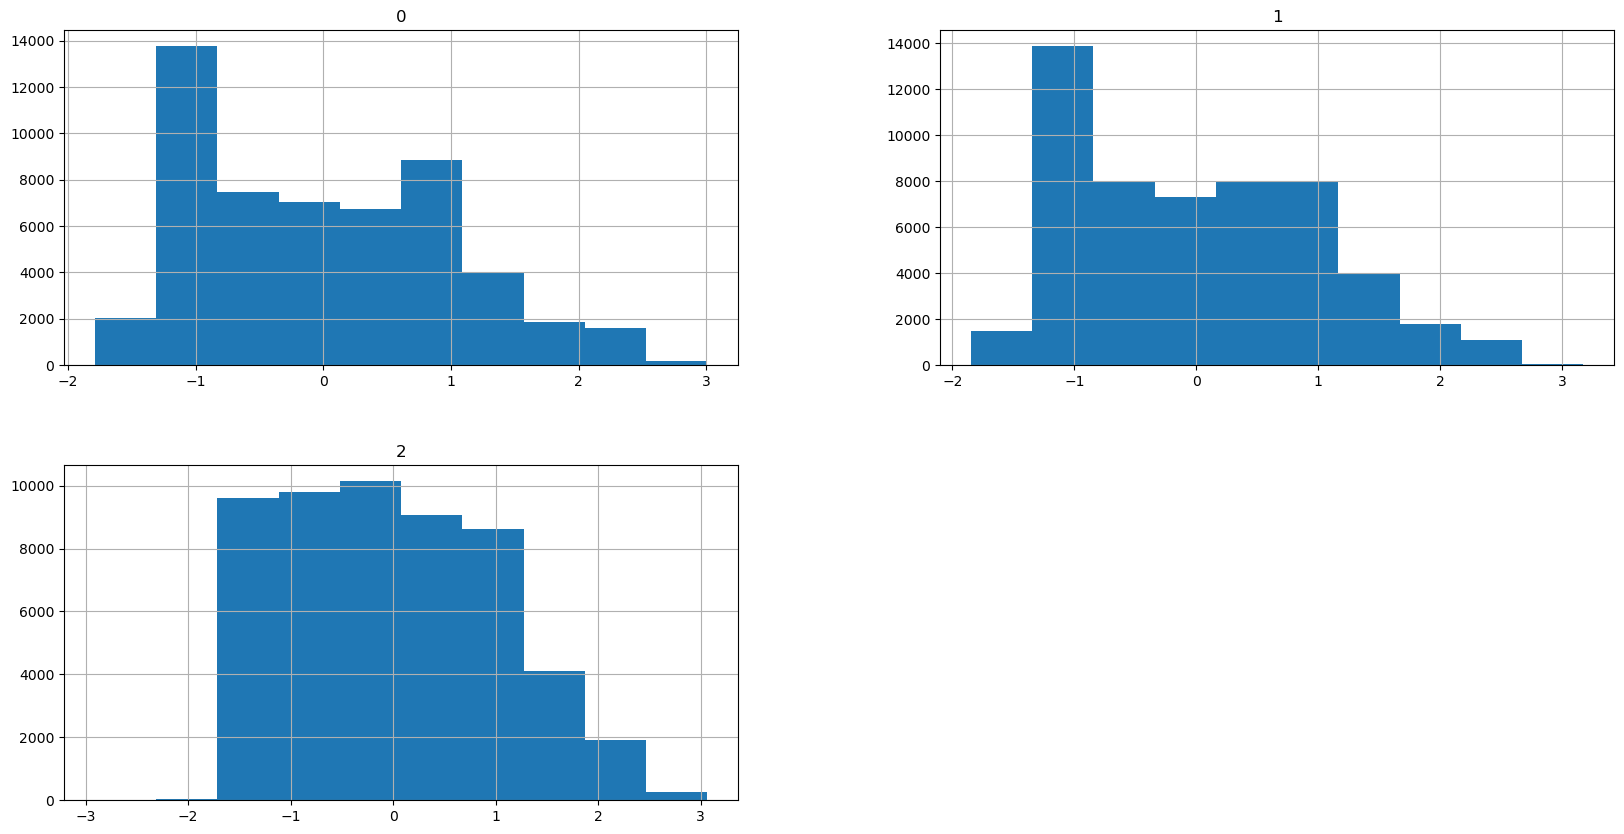

In [98]:
x_sc.hist(figsize = (20,10))
plt.show()

In [88]:
#MInMax Scaling

minmax = sk.MinMaxScaler()
x_minmax = minmax.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)

In [89]:
x_minmax

,0,1,2
0,0.041121,0.053908,0.218447
1,0.029907,0.028751,0.189320
2,0.087850,0.098832,0.266990
3,0.114019,0.120395,0.296117
4,0.039252,0.050314,0.230583
...,...,...,...
53544,0.377570,0.373765,0.478155
53545,0.366355,0.371968,0.504854
53546,0.360748,0.359389,0.492718
53547,0.452336,0.438455,0.536408


In [90]:
x_minmax.describe()

,0,1,2
count,53549.000000,53549.000000,53549.000000
mean,0.373100,0.368095,0.487105
std,0.208425,0.199005,0.167230
min,0.000000,0.000000,0.000000
25%,0.183178,0.186882,0.334951
50%,0.366355,0.364780,0.483010
75%,0.525234,0.512129,0.606796
max,1.000000,1.000000,1.000000


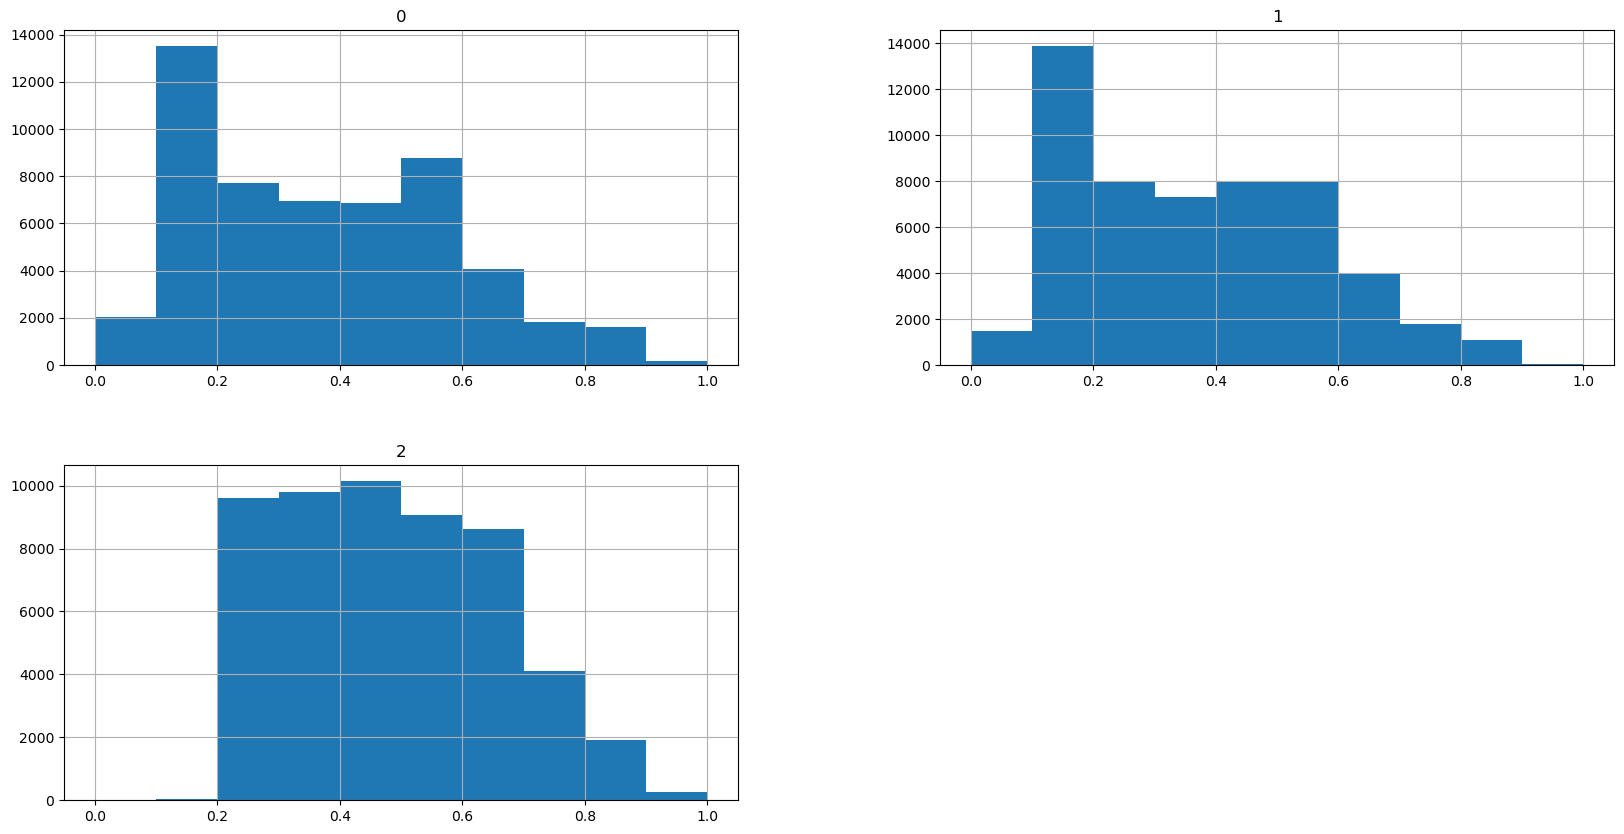

In [97]:
x_minmax.hist(figsize = (20,10))
plt.show()

In [92]:
#Normalization

x_norm = sk.normalize(x)
x_norm = pd.DataFrame(x_norm)

In [93]:
x_norm

,0,1,2
0,0.646345,0.651254,0.397625
1,0.655531,0.647105,0.389274
2,0.644631,0.649236,0.403662
3,0.644677,0.646162,0.408493
4,0.644642,0.647914,0.405764
...,...,...,...
53544,0.649023,0.650152,0.395058
53545,0.642330,0.649104,0.407524
53546,0.645136,0.647415,0.405774
53547,0.650932,0.647757,0.395851


In [94]:
x_norm.describe()

,0,1,2
count,53549.000000,53549.000000,53549.000000
mean,0.647764,0.648204,0.400171
std,0.003949,0.004194,0.007922
min,0.438069,0.475624,0.143426
25%,0.645248,0.645666,0.396363
50%,0.647347,0.648812,0.400676
75%,0.650109,0.650689,0.404373
max,0.781304,0.786397,0.580020


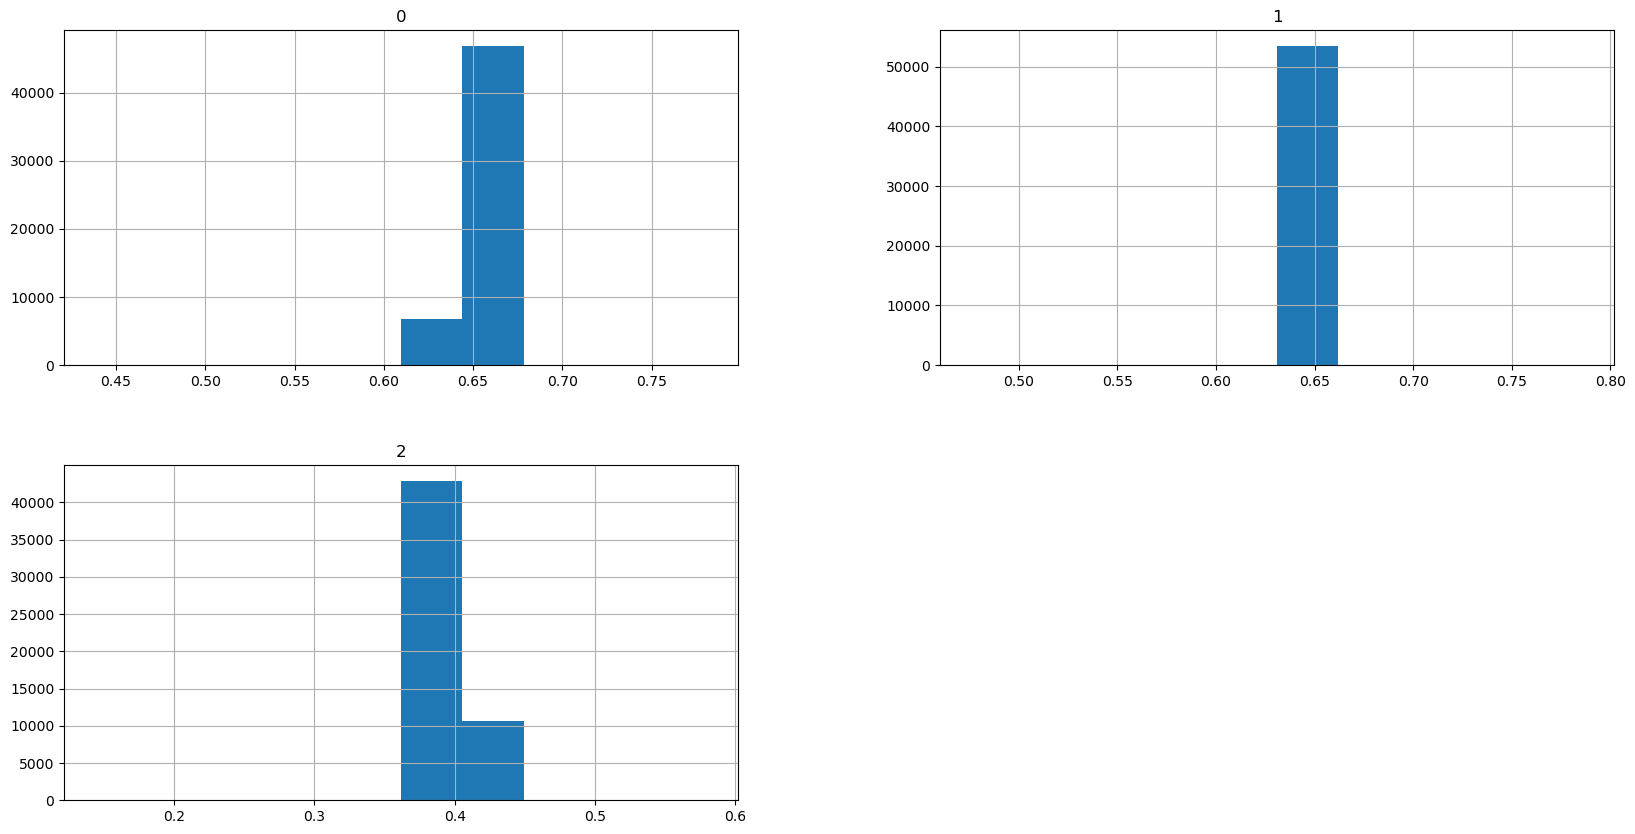

In [96]:
x_norm.hist(figsize = (20,10))
plt.show()